In [1]:
import sympy as sy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.integrate import trapz

In [2]:
x = sy.Symbol('x')
f = 2*x**2+4*x-1
f

2*x**2 + 4*x - 1

In [3]:
sy.integrate(f)

2*x**3/3 + 2*x**2 - x

In [4]:
def integral_f(x):
  return (2/3)*x**3 + 2*x**2 - x

In [5]:
integral_f(5) - integral_f(2)

116.99999999999999

In [6]:
def g(x):
  return 2*x**2+4*x-1
  
A = integrate.quad(g,2,5)
print(A[0])

117.0


In [7]:
print(A)

(117.0, 1.2989609388114332e-12)


In [8]:
def h(x):
  return 2*x**2+4*x-1

In [9]:
x = np.linspace(2,5)
y = h(x)

V = integrate.trapz(y,x)
V

117.00374843815077

### Luas Lingkaran

In [10]:
R=30
x=np.linspace(-R,R,100000) # np.linspace(dari,ke,jumlah data)

upper = np.sqrt(R**2 - x**2) # grafik atas
lower = -upper # grafik bawah

In [11]:
x # kumplan data random untuk pembuatan grafik

array([-30.        , -29.99939999, -29.99879999, ...,  29.99879999,
        29.99939999,  30.        ])

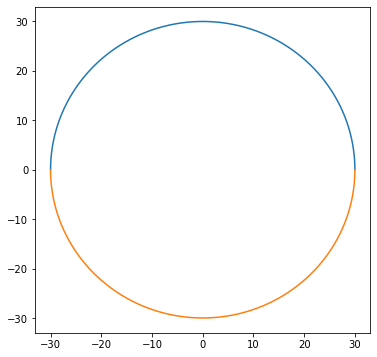

In [12]:
fig,ax = plt.subplots(figsize=(6,6))
ax.plot(x,upper)
ax.plot(x,lower)

In [13]:
area = trapz(upper,x) - trapz(lower,x) # Cara ke 1

print(area)

2827.4332935647208


In [14]:
def upper(x):
  return np.sqrt(R**2 - x**2)

def lower(x):
  return -np.sqrt(R**2 - x**2)

area = integrate.quad(upper,-R,R)[0] - integrate.quad(lower,-R,R)[0] # Cara kedua
print(area)

2827.4333882308197


In [15]:
print(np.pi*R**2) # pengecekan dengan rumus biasa

2827.4333882308138


### Luas Grafik Data

In [16]:
data = pd.read_csv("supermarket_sales - Sheet1.csv")
data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


Mencari data total penjualan kota Yangon

In [17]:
data_yangon = data[data["City"]=="Yangon"].sort_values(["Date","Time"]).reset_index(drop=True)
data_yangon

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,765-26-6951,A,Yangon,Normal,Male,Sports and travel,72.61,6,21.783,457.443,1/1/2019,10:39,Credit card,435.66,4.761905,21.783,6.9
1,651-88-7328,A,Yangon,Normal,Female,Fashion accessories,65.74,9,29.583,621.243,1/1/2019,13:55,Cash,591.66,4.761905,29.583,7.7
2,416-17-9926,A,Yangon,Member,Female,Electronic accessories,74.22,10,37.110,779.310,1/1/2019,14:42,Credit card,742.20,4.761905,37.110,4.3
3,530-90-9855,A,Yangon,Member,Male,Home and lifestyle,47.59,8,19.036,399.756,1/1/2019,14:47,Cash,380.72,4.761905,19.036,5.7
4,182-52-7000,A,Yangon,Member,Female,Sports and travel,27.04,4,5.408,113.568,1/1/2019,20:26,Ewallet,108.16,4.761905,5.408,6.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,308-47-4913,A,Yangon,Member,Female,Sports and travel,52.26,10,26.130,548.730,3/9/2019,12:45,Credit card,522.60,4.761905,26.130,6.2
336,652-43-6591,A,Yangon,Normal,Female,Fashion accessories,97.29,8,38.916,817.236,3/9/2019,13:18,Credit card,778.32,4.761905,38.916,6.2
337,127-47-6963,A,Yangon,Normal,Male,Health and beauty,51.71,4,10.342,217.182,3/9/2019,13:53,Credit card,206.84,4.761905,10.342,9.8
338,157-13-5295,A,Yangon,Member,Male,Health and beauty,51.94,10,25.970,545.370,3/9/2019,18:24,Ewallet,519.40,4.761905,25.970,6.5


<AxesSubplot:>

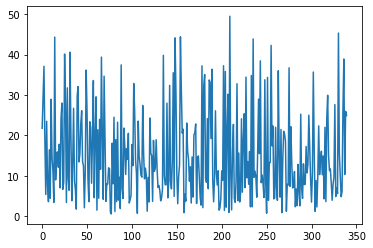

In [18]:
data_yangon["gross income"].plot(kind="line")

In [21]:
index_data = data_yangon.index
index_data

RangeIndex(start=0, stop=340, step=1)

In [23]:
gross_data_yangon = data_yangon["gross income"]
gross_data_yangon

0      21.783
1      29.583
2      37.110
3      19.036
4       5.408
        ...  
335    26.130
336    38.916
337    10.342
338    25.970
339    24.945
Name: gross income, Length: 340, dtype: float64

In [27]:
total_gross_income = integrate.trapz(gross_data_yangon,index_data)
total_gross_income

5033.7964999999995

In [26]:
data_yangon["gross income"].sum()

5057.1605

Hasil beda karena tingkat ketelitian dari perhitungan bawaan python berbeda